In [ ]:
# https://github.com/mzyates/techindicators
# https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01
# https://towardsdatascience.com/forecasting-time-series-data-stock-price-analysis-324bcc520af5

In [ ]:
!pip install mpl-finance
!pip install yfinance
!pip install YahooFinancials
import yfinance as yf
from yahoofinancials import YahooFinancials

%matplotlib inline
import numpy as np 
from techindicators import * # This line imports all functions from techindicators.py
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

from pylab import rcParams
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import math
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima


from mpl_finance import candlestick2_ohlc

## Importing data

Select a stock and import data for a set time period. 

In [ ]:
stockTicker = input("Enter Stock Symbol: ")

Enter Stock Symbol: AAPL


In [ ]:
start_date = input ("Enter the start date (YYYY-MM-DD): ")
end_date = input ("Enter the end date (YYYY-MM-DD): ")

Enter the start date (YYYY-MM-DD): 2019-01-01
Enter the end date (YYYY-MM-DD): 2021-03-01


In [ ]:
# Open, High, Low, Close, Volume
selectData = input("Enter data type: ")

Enter data type: Volume


In [ ]:
# view dataset of selected stock symbol

df = yf.download(stockTicker,
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.505024,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.669640,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.149662,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.069202,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.756794,164101200
...,...,...,...,...,...,...
2021-02-22,128.009995,129.720001,125.599998,126.000000,126.000000,103916400
2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,158273000
2021-02-24,124.940002,125.559998,122.230003,125.349998,125.349998,111039900


In [ ]:
df.to_csv('stockprice.csv', header=None)

In [ ]:
ticker = stockTicker
stockdata = np.genfromtxt('stockprice.csv', delimiter=',')
sd_open = stockdata[:,1] # Open
sd_high = stockdata[:,2] # High
sd_low = stockdata[:,3] # Low
sd_close = stockdata[:,4] # Close
sd_adjclose = stockdata[:,5] # Adj Volume
sd_volume = stockdata[:,6] # Volume
sd_dates = np.loadtxt('stockprice.csv', delimiter=',', usecols=(0), dtype='datetime64[D]') # Dates
tradedays = np.arange(len(sd_close)) # Array of number of trading days

In [ ]:
selection = input('Enter the associated number (1-movingaverages, 2-accdistline, 3-latestvalues, 4-macd, 5-ppo, 6-trix, 7-keltner, 8-bollinger, 9-stochastic, 10-vortex, 11-adx, 12-aroon, 13-chandelier, 14-coppock, 15-force, 16-chaikinflow, 17-chaikinoscillator, 18-emv, 19-massindex, 20-mfi, 21-nvi, 22-obv, 23-pvo, 24-kst): ')

Enter the associated number (1-movingaverages, 2-accdistline, 3-latestvalues, 4-macd, 5-ppo, 6-trix, 7-keltner, 8-bollinger, 9-stochastic, 10-vortex, 11-adx, 12-aroon, 13-chandelier, 14-coppock, 15-force, 16-chaikinflow, 17-chaikinoscillator, 18-emv, 19-massindex, 20-mfi, 21-nvi, 22-obv, 23-pvo, 24-kst): 3


In [ ]:
if selection == "1":
    # calculate moving averages
    sma50 = sma(sd_close,50) # calculate 50 day SMA of closing price
    ema20 = ema(sd_close,20) # calculate 20 day EMA of closing price
    wma50 = wma(sd_close,50) # calculated 50 day WMA of closing price
    kama_sd = kama(sd_close,10,2,30) # calculate standard Kaufman adaptive moving average
    # plot daily closing price of stock along with 50-day SMA, 20-day EMA, and KAMA
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(sd_dates.astype(datetime),sd_close,color='green',lw=2,label="Close")
    ax.plot(sd_dates[len(sd_dates)-len(sma50):].astype(datetime),sma50,color='red',lw=2,label='50-Day SMA')
    ax.plot(sd_dates[len(sd_dates)-len(wma50):].astype(datetime),wma50,color='darkcyan',lw=2,label='50-Day WMA')
    ax.plot(sd_dates[len(sd_dates)-len(ema20):].astype(datetime),ema20,color='blue',lw=2,label='20-Day EMA')
    ax.plot(sd_dates[len(sd_dates)-len(kama_sd):].astype(datetime),kama_sd,color='black',lw=2,label='KAMA')
    ax.set_title(ticker,fontsize=30)
    ax.set_xlabel('Date',fontsize=24)
    ax.set_ylabel('Price ($)',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
    fig.autofmt_xdate()
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()
    
elif selection == "2":
    # calculate the Accumulation/Distribution line
    adl_sd = adl(sd_high,sd_low,sd_close,sd_volume)
    # plot the accumulation/distribution line
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays,adl_sd,color='green',lw=2)
    ax.set_title('Accumulation/Distribution Line for %s' % ticker,fontsize=24)
    ax.set_yticks([])
    ax.set_xlabel('Trading Days in Time Period',fontsize=18)
    ax.set_ylabel('',fontsize=18)
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.show()
    
elif selection == "3":
    cci20 = cci(sd_high,sd_low,sd_close,20) # 20-day commodity channel index
    atr14 = atr(sd_high,sd_low,sd_close,14) # 14-day average true range
    rsi14 = rsi(sd_close,14) # 14-day relative strength index
    rstd10 = rstd(sd_close,10) # 10-day rolling standard deviation
    roc12 = roc(sd_close,12) # 12-day rate of change
    print('Technical indicator values for {} on {}:'.format(ticker,sd_dates[-1]))
    print('')
    print('The 20-day Commodity Channel Index was {:.2f}.'.format(cci20[-1]))
    print('The 14-day Average True Range was {:.2f}.'.format(atr14[-1]))
    print('The 14-day Relative Strength Index was {:.2f}.'.format(rsi14[-1]))
    print('The 10-day Rolling standard deviation was {:.2f}.'.format(rstd10[-1]))
    print('The 12-day rate of change was {:.2f}.'.format(roc12[-1]))

elif selection == "4":
    macd_line_sd = macd(sd_close,12,26,9)[0]
    macd_signal_sd = macd(sd_close,12,26,9)[1]
    macd_histogram_sd = macd_line_sd[len(macd_line_sd)-len(macd_signal_sd):]-macd_signal_sd
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(macd_line_sd):],macd_line_sd,color='green',lw=2,label="Line")
    ax.plot(tradedays[len(tradedays)-len(macd_signal_sd):],macd_signal_sd,color='red',lw=2,label="Signal")
    ax.set_title('MACD (12,26,9) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "5":
    ppo_line_sd = ppo(sd_close,12,26,9)[0]
    ppo_signal_sd = ppo(sd_close,12,26,9)[1]
    ppo_histogram_sd = ppo_line_sd[len(ppo_line_sd)-len(ppo_signal_sd):]-ppo_signal_sd
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(ppo_line_sd):],ppo_line_sd,color='green',lw=2,label="Line")
    ax.plot(tradedays[len(tradedays)-len(ppo_signal_sd):],ppo_signal_sd,color='red',lw=2,label="Signal")
    ax.set_title('PPO (12,26,9) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "6":
    trix_line_sd = trix(sd_close,15,9)[0]
    trix_signal_sd = trix(sd_close,15,9)[1]
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(trix_line_sd):],trix_line_sd,color='green',lw=2,label="Line")
    ax.plot(tradedays[len(tradedays)-len(trix_signal_sd):],trix_signal_sd,color='red',lw=2,label="Signal")
    ax.set_title('TRIX (15,9) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "7":
    kelt_sd = kelt(sd_high,sd_low,sd_close,20,2.0,10) # Kelter Channel calculated with standard parameters
    lowl = kelt_sd[0] # lower line
    cenl = kelt_sd[1] # center line
    uppl = kelt_sd[2] # upper line
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_ylabel('Price ($)')
    ax.set_xlabel('Date')
    candlestick2_ohlc(ax,sd_open,sd_high,sd_low,sd_close,width=0.8,colorup='g',colordown='r',alpha=0.75)
    ax.plot(tradedays[len(sd_dates)-len(lowl):],lowl,color='blue',lw=1.5,label='Keltner Channels (20,2,10)')
    ax.plot(tradedays[len(sd_dates)-len(uppl):],uppl,color='blue',lw=1.5,label='')
    ax.plot(tradedays[len(sd_dates)-len(cenl):],cenl,color='blue',lw=1.0,linestyle='--',label='')
    ax.set_title(ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('Price ($)',fontsize=24)
    ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

elif selection == "8":
    boll_sd = boll(sd_close,20,2.0,20) # Bollinger Bands calculated with standard parameters
    lowlb = boll_sd[0] # lower line
    cenlb = boll_sd[1] # center line
    upplb = boll_sd[2] # upper line
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_ylabel('Price ($)')
    ax.set_xlabel('Date')
    candlestick2_ohlc(ax,sd_open,sd_high,sd_low,sd_close,width=0.8,colorup='g',colordown='r',alpha=0.75)
    ax.plot(tradedays[len(sd_dates)-len(lowlb):],lowlb,color='blue',lw=1.5,label='Bollinger Bands$^\circledR$ (20,2,20)')
    ax.plot(tradedays[len(sd_dates)-len(upplb):],upplb,color='blue',lw=1.5,label='')
    ax.plot(tradedays[len(sd_dates)-len(cenlb):],cenlb,color='blue',lw=1.0,linestyle='--',label='')
    ax.set_title(ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('Price ($)',fontsize=24)
    ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

elif selection == "9":
    stoch_sd = stoch(sd_high,sd_low,sd_close,14,3,3) # Full stochastics calculated with standard parameters
    stoch_k = stoch_sd[0] # %K parameter
    stoch_d = stoch_sd[1] # %D parameter
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(stoch_k):],stoch_k,color='green',lw=2,label="%K")
    ax.plot(tradedays[len(tradedays)-len(stoch_d):],stoch_d,color='red',lw=2,label="%D")
    ax.set_title('Stochastic Ocsillator (14,3,3) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()
    
elif selection == "10":
    vort_sd = vortex(sd_high,sd_low,sd_close,14)
    vort_p_sd = vort_sd[0]
    vort_n_sd = vort_sd[1]
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(vort_p_sd):],vort_p_sd,color='green',lw=2,label="+VM")
    ax.plot(tradedays[len(tradedays)-len(vort_n_sd):],vort_n_sd,color='red',lw=2,label="$-$VM")
    ax.set_title('Vortex Indicator (14) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "11":
    adx_sd = adx(sd_high,sd_low,sd_close,14)
    adx_pdm = adx_sd[0]
    adx_ndm = adx_sd[1]
    adx_line = adx_sd[2]
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(adx_pdm):],adx_pdm,color='green',lw=1.5,label="$+$DI")
    ax.plot(tradedays[len(tradedays)-len(adx_ndm):],adx_ndm,color='red',lw=1.5,label="$-$DI")
    ax.plot(tradedays[len(tradedays)-len(adx_line):],adx_line,color='black',lw=2.5,label="ADX")
    ax.set_title('ADX(14) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "12":
    aroon_sd = aroon(sd_high,sd_low,25)
    aroon_up = aroon_sd[0]
    aroon_down = aroon_sd[1]
    aroon_osc = aroon_sd[2]
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(aroon_up):],aroon_up,color='green',lw=2,label="Up")
    ax.plot(tradedays[len(tradedays)-len(aroon_down):],aroon_down,color='red',lw=2,label="Down")
    ax.set_title('Aroon(25) Indicator for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "13":
    chand_long = chand(sd_high,sd_low,sd_close,22,3,'long')
    chand_short = chand(sd_high,sd_low,sd_close,22,3,'short')
    # plot long
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_ylabel('Price ($)')
    ax.set_xlabel('Date')
    candlestick2_ohlc(ax,sd_open,sd_high,sd_low,sd_close,width=0.8,colorup='g',colordown='r',alpha=0.75)
    ax.plot(tradedays[len(sd_dates)-len(chand_long):],chand_long,color='blue',lw=1.5,label='Chandelier Exit (22,3)')
    ax.set_title('Chandelier Exit for %s Long Position' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('Price ($)',fontsize=24)
    ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()
    # plot short
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_ylabel('Price ($)')
    ax.set_xlabel('Date')
    candlestick2_ohlc(ax,sd_open,sd_high,sd_low,sd_close,width=0.8,colorup='g',colordown='r',alpha=0.75)
    ax.plot(tradedays[len(sd_dates)-len(chand_short):],chand_short,color='blue',lw=1.5,label='Chandelier Exit (22,3)')
    ax.set_title('Chandelier Exit for %s Short Position' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('Price ($)',fontsize=24)
    ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

elif selection == "14":
    copp_sd = copp(sd_close,14,11,10)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(copp_sd):],copp_sd,color='blue',lw=2)
    ax.plot(tradedays[len(tradedays)-len(copp_sd):],np.zeros(len(copp_sd)),color='black',linestyle='dashed',lw=2)
    ax.set_title('Coppock Curve (14,11,10) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.xlim(np.amin(tradedays[len(tradedays)-len(copp_sd):]),np.amax(tradedays[len(tradedays)-len(copp_sd):]))
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "15":
    force_sd = force(sd_close,sd_volume,13)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(force_sd):],force_sd,color='blue',lw=2)
    ax.plot(tradedays[len(tradedays)-len(force_sd):],np.zeros(len(force_sd)),color='gray',linestyle='dashed')
    ax.set_title('Force Index(13) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    plt.xlim(np.amin(tradedays[len(tradedays)-len(force_sd):]),np.amax(tradedays[len(tradedays)-len(force_sd):]))
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "16":
    cmf_sd = cmf(sd_high,sd_low,sd_close,sd_volume,20)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(cmf_sd):],cmf_sd,color='blue',lw=2)
    ax.plot(tradedays[len(tradedays)-len(cmf_sd):],np.zeros(len(cmf_sd)),color='gray',linestyle='dashed')
    ax.set_title('Chaikin Money Flow(20) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    plt.xlim(np.amin(tradedays[len(tradedays)-len(cmf_sd):]),np.amax(tradedays[len(tradedays)-len(cmf_sd):]))
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "17":
    chosc_sd = chosc(sd_high,sd_low,sd_close,sd_volume,3,10)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(chosc_sd):],chosc_sd,color='blue',lw=2)
    ax.plot(tradedays[len(tradedays)-len(chosc_sd):],np.zeros(len(chosc_sd)),color='gray',linestyle='dashed')
    ax.set_title('Chaikin Oscillator(3,10) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    plt.xlim(np.amin(tradedays[len(tradedays)-len(chosc_sd):]),np.amax(tradedays[len(tradedays)-len(chosc_sd):]))
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "18":
    emv_sd = emv(sd_high,sd_low,sd_volume,14)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(emv_sd):],emv_sd,color='blue',lw=2)
    ax.plot(tradedays[len(tradedays)-len(emv_sd):],np.zeros(len(emv_sd)),color='gray',linestyle='dashed')
    ax.set_title('Ease of Movement(14) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    plt.xlim(np.amin(tradedays[len(tradedays)-len(emv_sd):]),np.amax(tradedays[len(tradedays)-len(emv_sd):]))
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "19":
    mindx_sd = mindx(sd_high,sd_low,25)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(mindx_sd):],mindx_sd,color='blue',lw=2)
    ax.plot(tradedays[len(tradedays)-len(mindx_sd):],np.zeros(len(mindx_sd))+27,color='gray',linestyle='dashed')
    ax.set_title('Mass Index(25) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    plt.xlim(np.amin(tradedays[len(tradedays)-len(mindx_sd):]),np.amax(tradedays[len(tradedays)-len(mindx_sd):]))
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "20":
    mfi_sd = mfi(sd_high,sd_low,sd_close,sd_volume,14)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(mfi_sd):],mfi_sd,color='blue',lw=2)
    ax.plot(tradedays[len(tradedays)-len(mfi_sd):],np.zeros(len(mfi_sd))+50,color='black',lw=1)
    ax.plot(tradedays[len(tradedays)-len(mfi_sd):],np.zeros(len(mfi_sd))+20,color='black',lw=1,linestyle='dashed')
    ax.plot(tradedays[len(tradedays)-len(mfi_sd):],np.zeros(len(mfi_sd))+80,color='black',lw=1,linestyle='dashed')
    ax.set_title('MFI (14) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    plt.ylim(0,100)
    plt.xlim(np.amin(tradedays[len(tradedays)-len(mfi_sd):]),np.amax(tradedays[len(tradedays)-len(mfi_sd):]))
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "21":
    nvi_sd = nvi(sd_close,sd_volume,50)
    nvi_line = nvi_sd[0]
    nvi_signal = nvi_sd[1]
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(nvi_line):],nvi_line,color='green',lw=2,label="NVI")
    ax.plot(tradedays[len(tradedays)-len(nvi_signal):],nvi_signal,color='red',lw=2,label="Signal (50 day EMA)")
    ax.set_title('NVI for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks([],[])
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "22":
    obv_sd = obv(sd_close,sd_volume)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays,obv_sd,color='green',lw=2)
    ax.set_title('On Balance Volume for %s' % ticker,fontsize=24)
    ax.set_yticks([])
    ax.set_xlabel('Trading Days in Time Period',fontsize=18)
    ax.set_ylabel('',fontsize=18)
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.show()

elif selection == "23":
    pvo_line_sd = pvo(sd_close,12,26,9)[0]
    pvo_signal_sd = pvo(sd_close,12,26,9)[1]
    pvo_histogram_sd = pvo_line_sd[len(pvo_line_sd)-len(pvo_signal_sd):]-pvo_signal_sd
    # pvo line
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(pvo_line_sd):],pvo_line_sd,color='green',lw=2,label="Line")
    ax.plot(tradedays[len(tradedays)-len(pvo_signal_sd):],pvo_signal_sd,color='red',lw=2,label="Signal")
    ax.set_title('PVO (12,26,9) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()
    # signal plot
    fig, ax = plt.subplots(figsize=(10,4))
    ax.bar(tradedays[len(tradedays)-len(pvo_histogram_sd):],pvo_histogram_sd,label="PVO Histogram")
    ax.set_title(ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=14, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

elif selection == "24":
    kst_sd = kst(sd_close,10,15,20,30,10,10,10,15,9)
    kst_line = kst_sd[0]
    kst_signal = kst_sd[1]
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(tradedays[len(tradedays)-len(kst_line):],kst_line,color='green',lw=2,label="Line")
    ax.plot(tradedays[len(tradedays)-len(kst_signal):],kst_signal,color='red',lw=2,label="Signal")
    ax.set_title('Know Sure Thing (KST) for %s' % ticker,fontsize=30)
    ax.set_xlabel('Trading Days in Time Period',fontsize=24)
    ax.set_ylabel('',fontsize=24)
    ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
    ax.grid(color='gray', linestyle='--', linewidth=1)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()

else: 
    print("Invalid Selection")

Technical indicator values for AAPL on 2021-02-26:

The 20-day Commodity Channel Index was -142.65.
The 14-day Average True Range was 3.84.
The 14-day Relative Strength Index was 29.11.
The 10-day Rolling standard deviation was 4.54.
The 12-day rate of change was -10.84.


# Plot 

Text(0.5, 1.0, '$AAPL Volume')

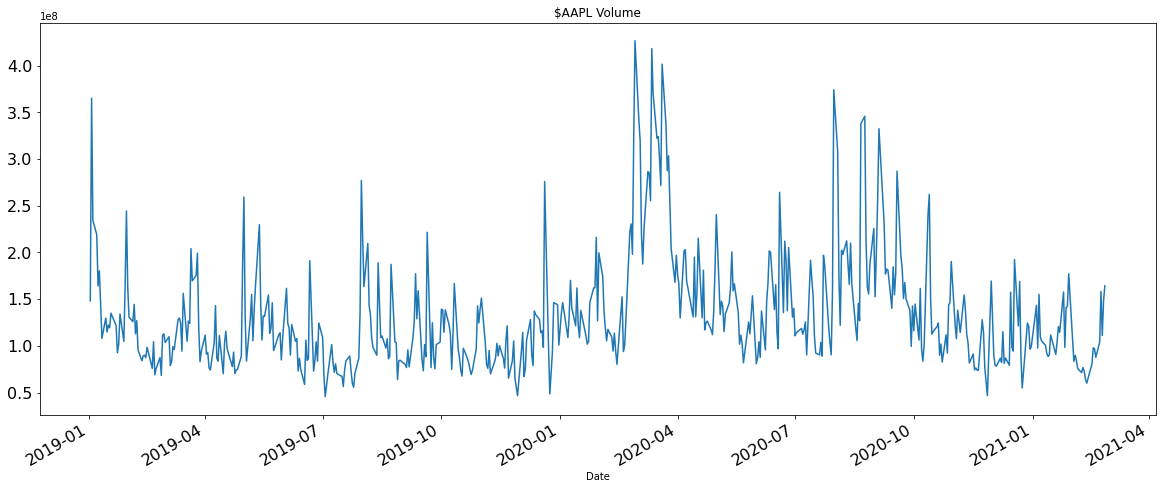

In [ ]:
# volume is measured of how many shares are traded on any given day

df[selectData].plot(figsize=(20, 8), fontsize = 16)
plt.title("$"+stockTicker + " " + selectData)


# Subplots

Text(0.5, 1.0, '$AAPL')

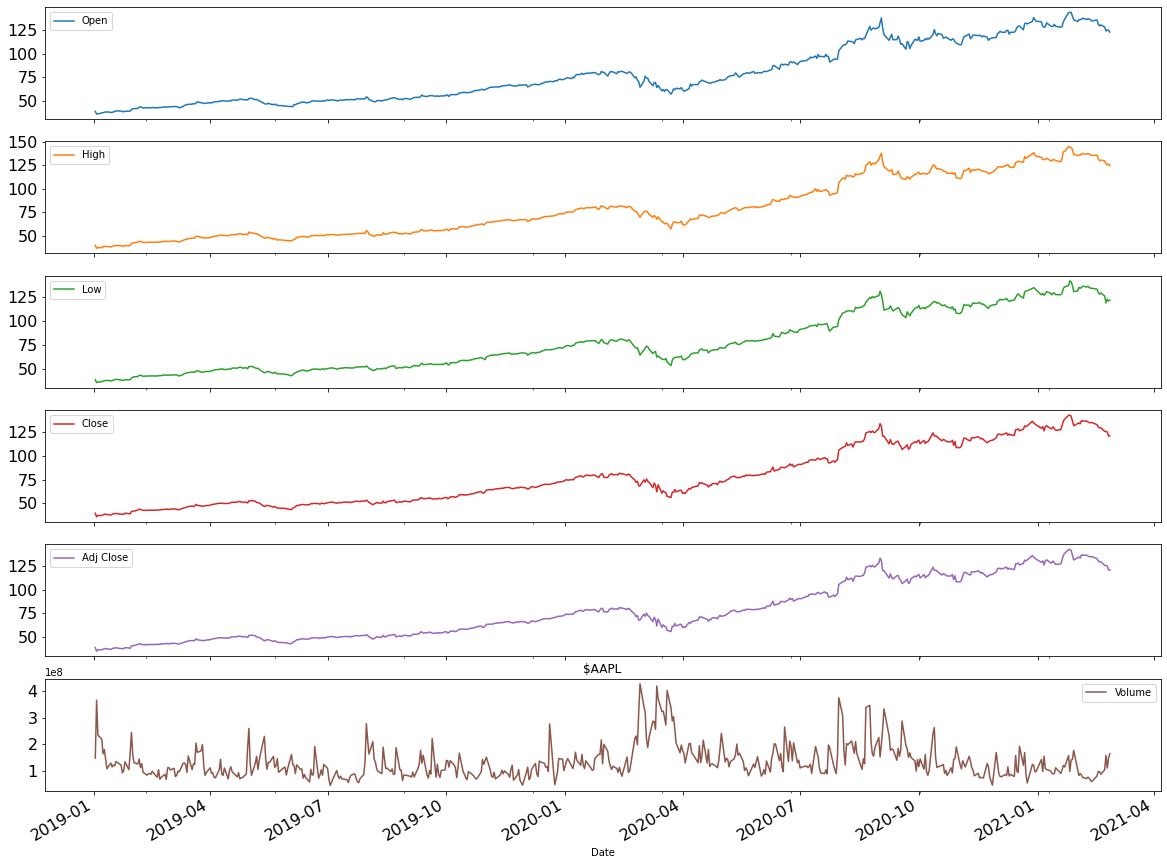

In [ ]:
df.plot(subplots=True, figsize=(20,16), fontsize = 16)
plt.title("$"+stockTicker)

# The shape of the curve for ‘Open’, ‘Close’, ‘High’ and ‘Low’ data have the same shape. Only the ‘Volume’ has a different shape

# Seasonality

Text(0.5, 1.0, 'Seasonality: Avg. Monthly $AAPL Volume')

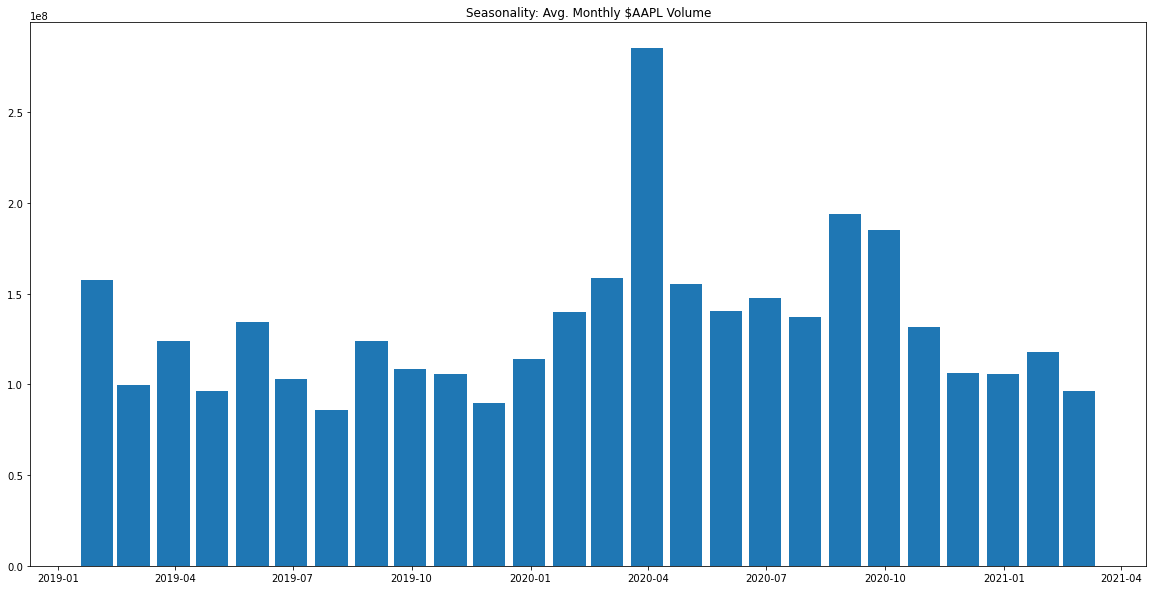

In [ ]:
df_month = df.resample("M").mean()
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df_month[start_date:].index, df_month.loc[start_date:, selectData], width=25, align='center')
plt.title("Seasonality: Avg. Monthly $"+stockTicker + " " + selectData)

# Plotting daily and weekly volume

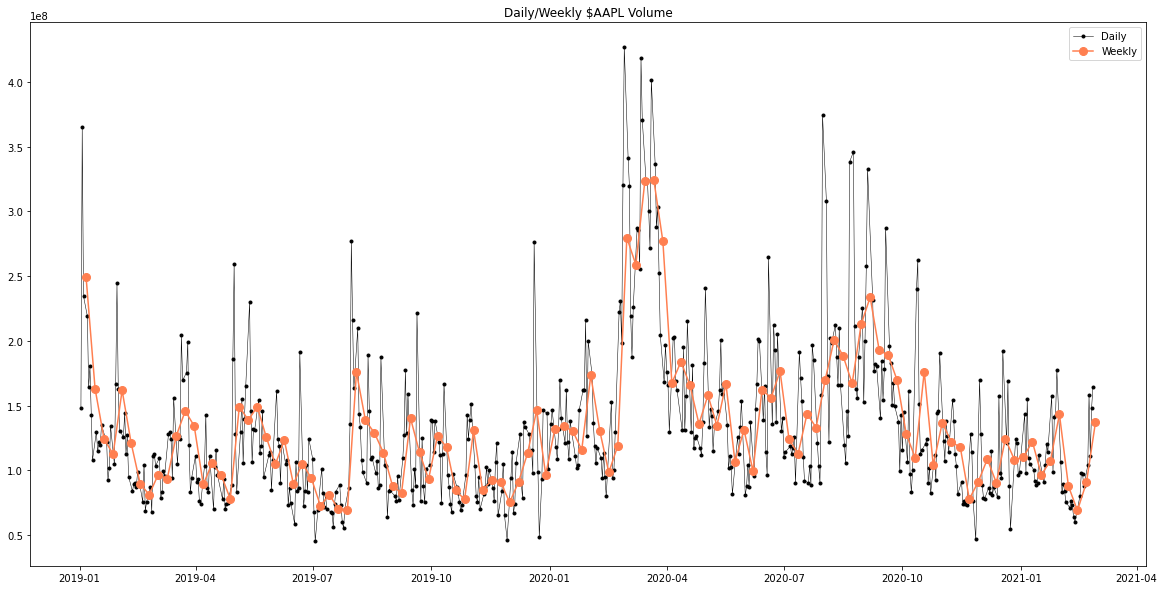

In [ ]:
df_week = df.resample("W").mean()

start, end = start_date, end_date
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.loc[start:end, selectData], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(df_week.loc[start:end, selectData], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
plt.title("Daily/Weekly $"+stockTicker + " " + selectData)
ax.legend()

# Plotting 7 day rolling average

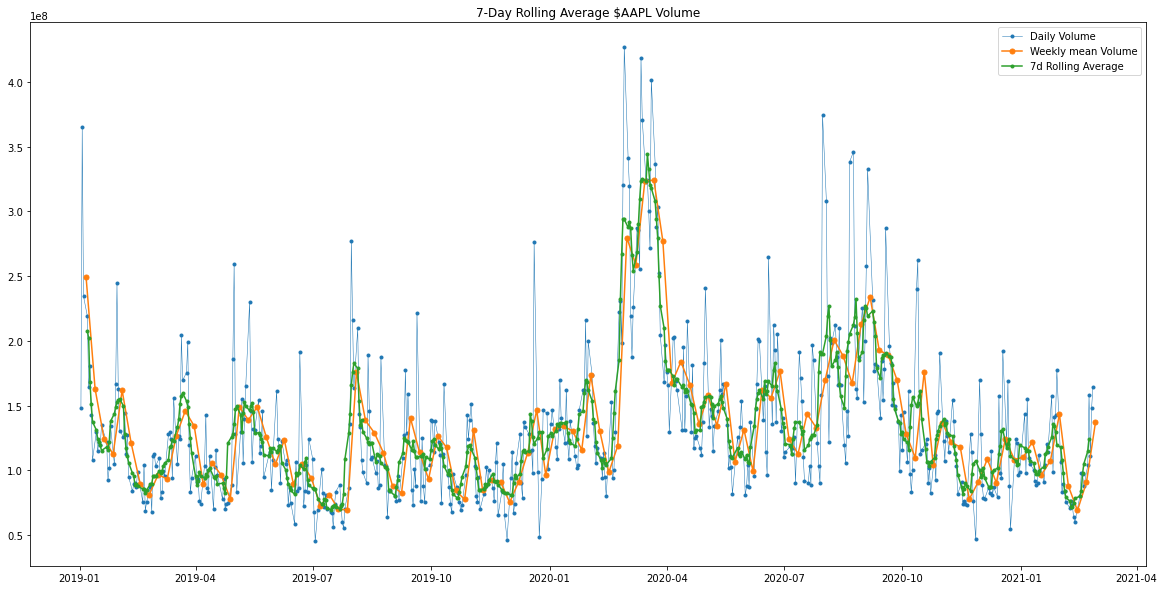

In [ ]:
df_7d_rolling = df.rolling(7, center=True).mean()
start, end = start_date, end_date
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.loc[start:end, selectData], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily ' + selectData)
ax.plot(df_week.loc[start:end, selectData], marker='o', markersize=5, 
        linestyle='-', label = 'Weekly mean ' + selectData)
ax.plot(df_7d_rolling.loc[start:end, selectData], marker='.', linestyle='-', label='7d Rolling Average')
plt.title("7-Day Rolling Average $"+stockTicker + " " + selectData)
ax.legend()

# Plotting Shift (Division)

Text(0.5, 1.0, '$AAPL Volume Change')

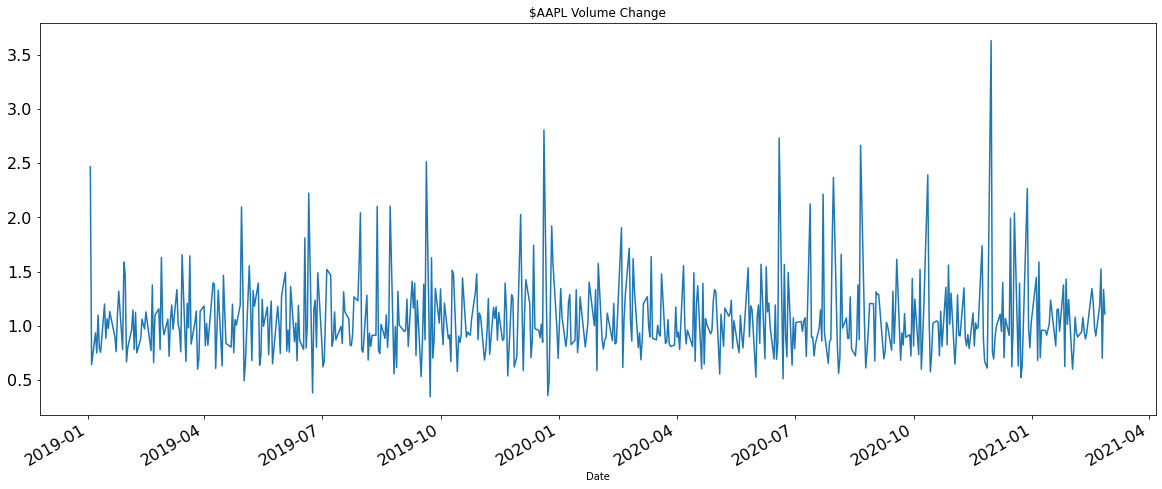

In [ ]:
df['Change'] = df[selectData].div(df[selectData].shift())
df['Change'].plot(figsize=(20, 8), fontsize = 16)
plt.title("$"+stockTicker + " " + selectData + " Change")

# Plotting month-over-month percentage change

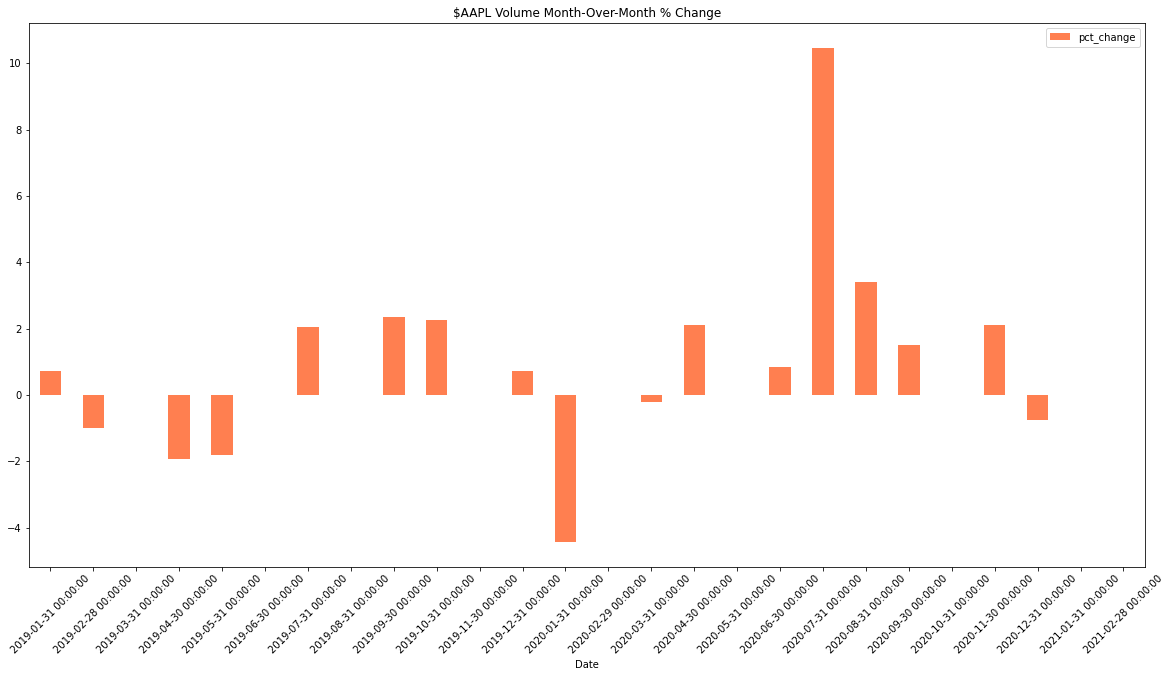

In [ ]:
df_month.loc[:, 'pct_change'] = df.Close.pct_change()*100
fig, ax = plt.subplots(figsize=(20, 10))
df_month['pct_change' ].plot(kind='bar', color='coral', ax=ax)
plt.xticks(rotation=45)
plt.title("$"+stockTicker + " " + selectData + " Month-Over-Month % Change")
ax.legend()

# Plotting difference

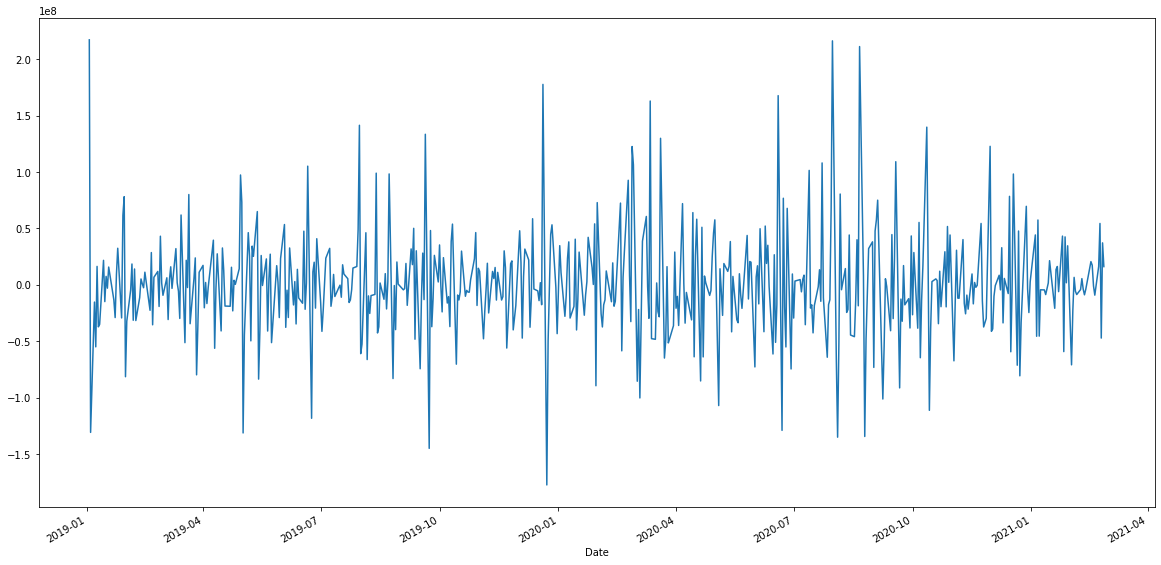

In [ ]:
df[selectData].diff().plot(figsize=(20, 10))

# Decomposition of cyclic object

Observations= Trend + Seasonality + Residual

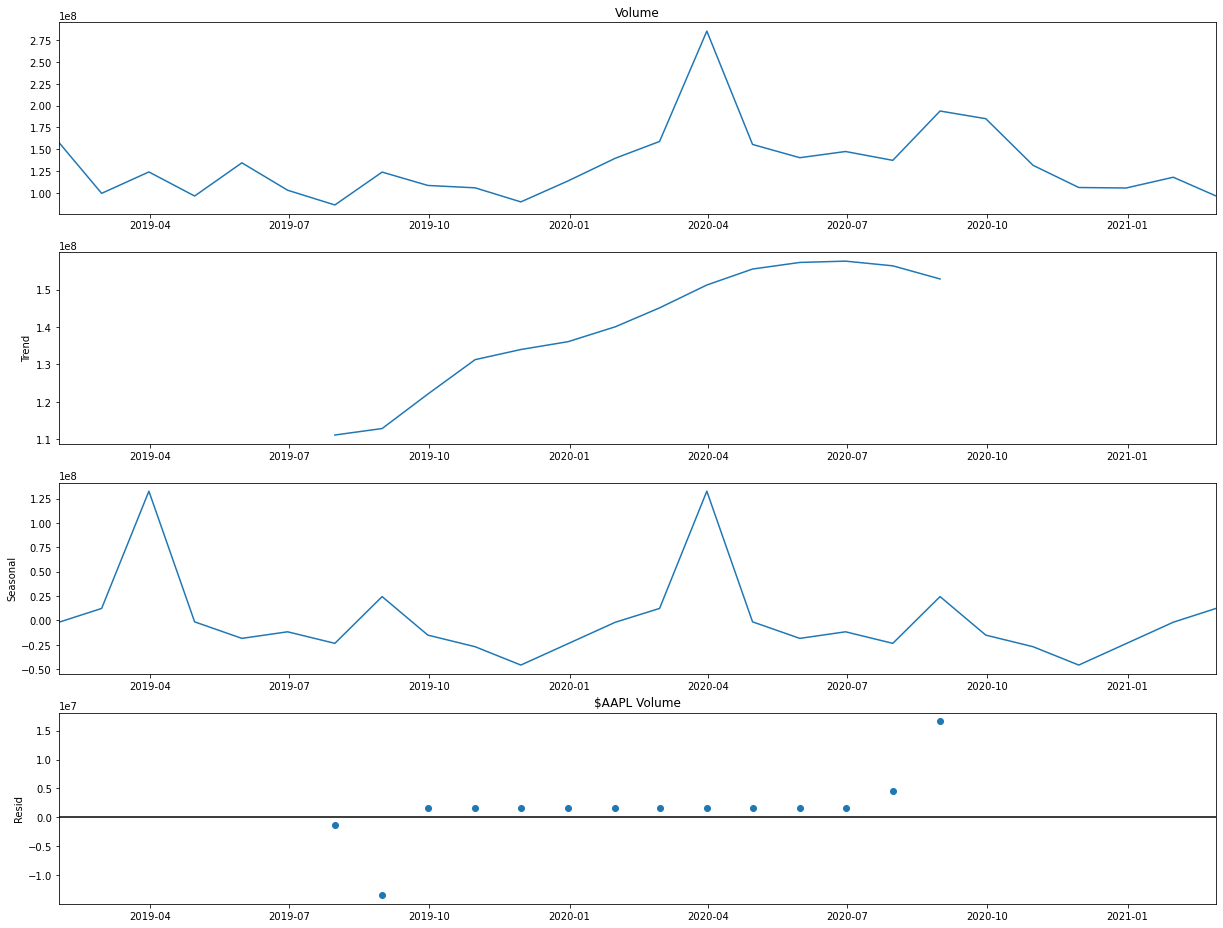

In [ ]:
rcParams['figure.figsize'] = 17, 13
decomposition = sm.tsa.seasonal_decompose(df_month[selectData], model='Additive')
fig = decomposition.plot()
plt.title("$"+stockTicker + " " + selectData)
plt.show()

# ADF & KPSS Rolling Statistics Test

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -3.809960
p-value: 0.002807
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.334523
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


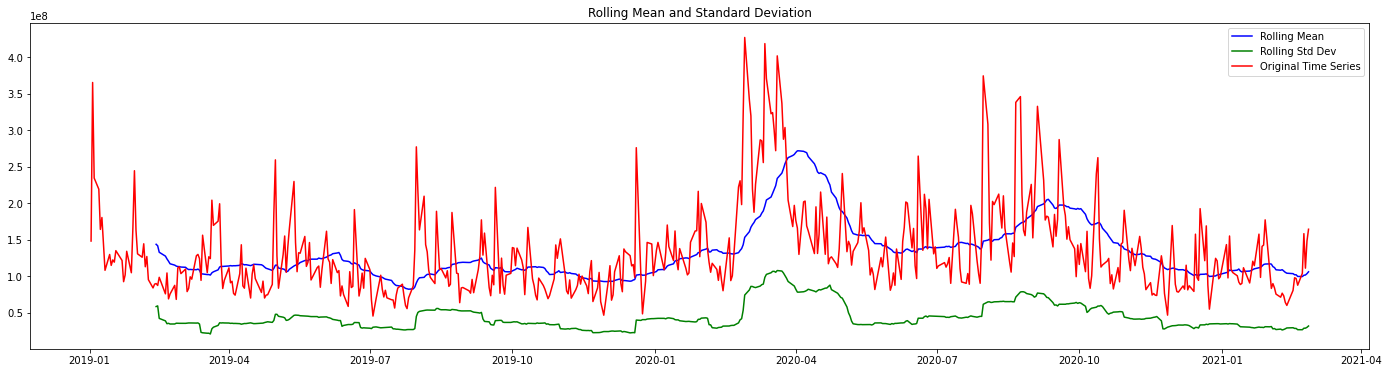

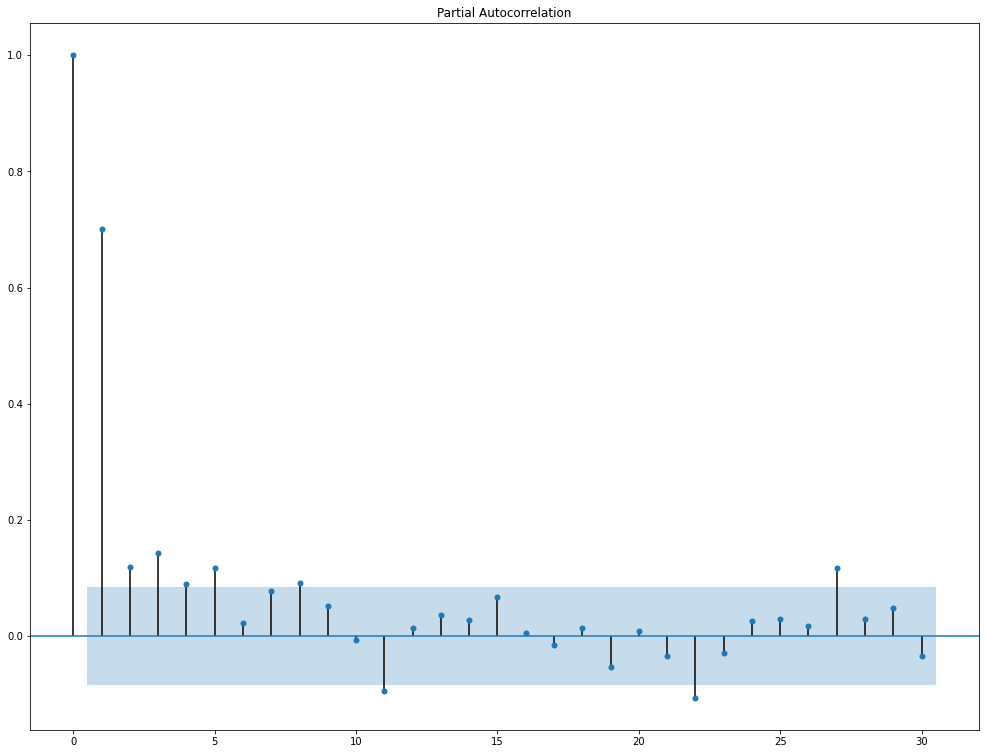

In [ ]:
#Testing for stationarity using ADF and KPSS Tests.

def stationarity_test(selectData):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = selectData.rolling(30).mean()
    rolling_std_dev = selectData.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='blue', label= 'Rolling Mean')
    plt.plot(rolling_std_dev, color='green', label = 'Rolling Std Dev')
    plt.plot(selectData, color='red',label='Original Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(selectData,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(selectData, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(df[selectData].dropna())

# PACF Plot

pacf = plot_pacf(df[selectData].dropna(), lags=30, alpha=0.05)

# De-Trend Time Series (ADF/KPSS)

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -4.039617
p-value: 0.001217
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.068706
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


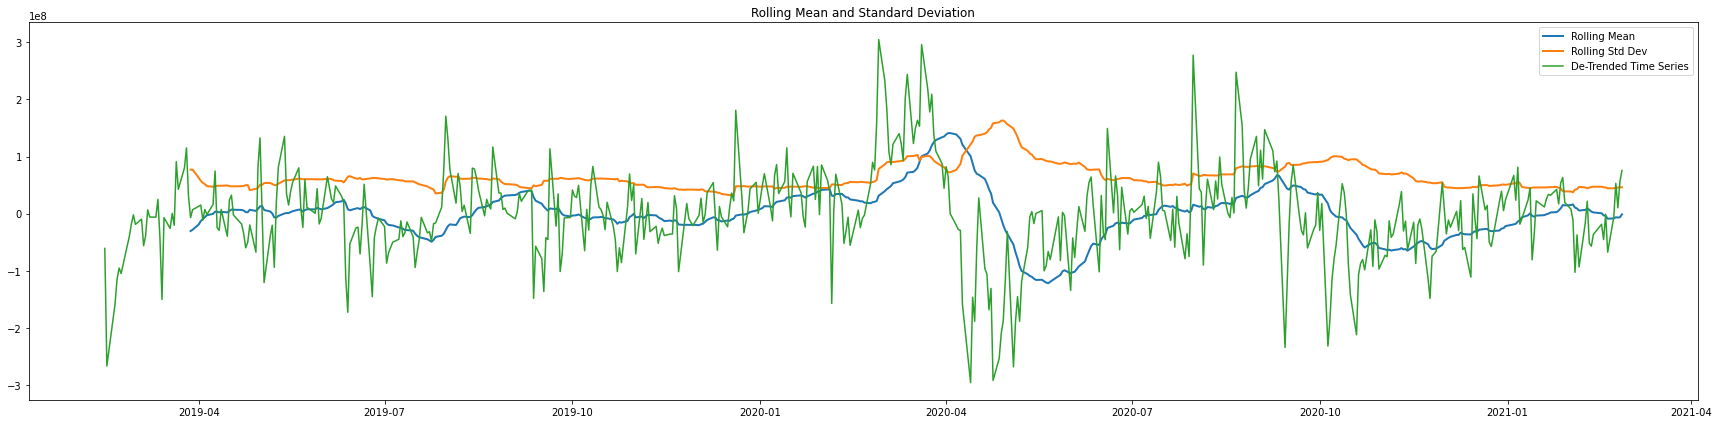

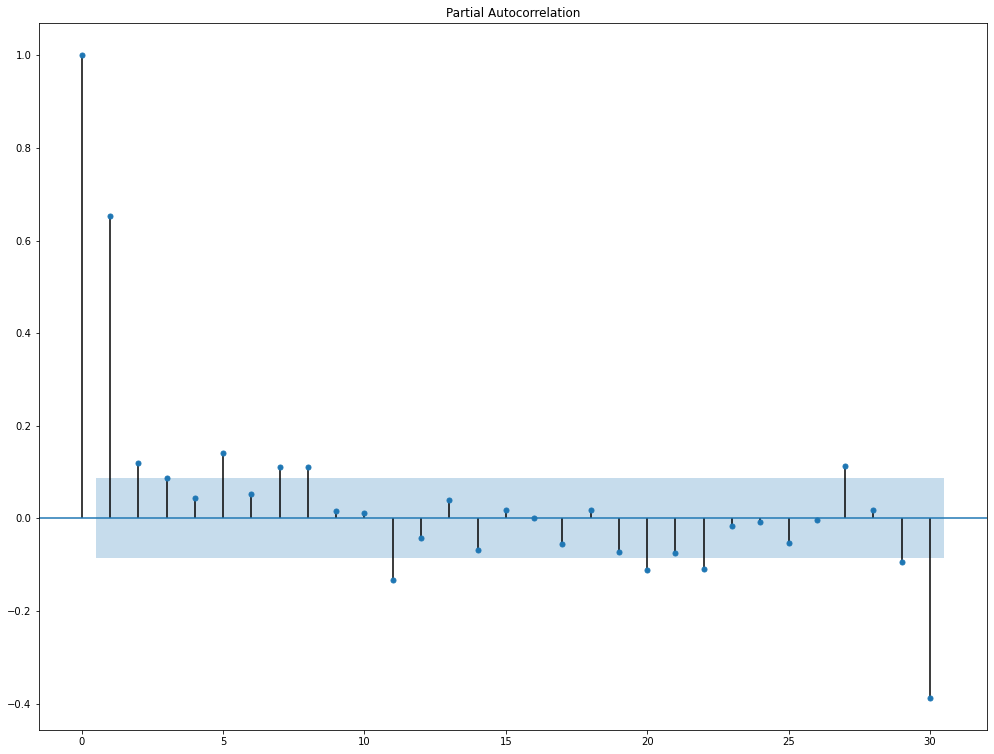

In [ ]:
#Testing for stationarity of de-trended time series using ADF and KPSS Tests.

# De-trending the time series
df['Detrend'] = (df[selectData] - df[selectData].shift(30))

def stationarity_test(selectData):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = selectData.rolling(30).mean()
    rolling_std_dev = selectData.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, label='Rolling Mean',linewidth=2.0)
    plt.plot(rolling_std_dev, label = 'Rolling Std Dev',linewidth=2.0)
    plt.plot(selectData,label='De-Trended Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.tight_layout()
    
    print("ADF Test:")
    adf_test = adfuller(selectData,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(selectData, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(df['Detrend'].dropna())

# PACF Plot
pacf = plot_pacf(df['Detrend'].dropna(), lags=30)


# Split Dataset (Train/Test)

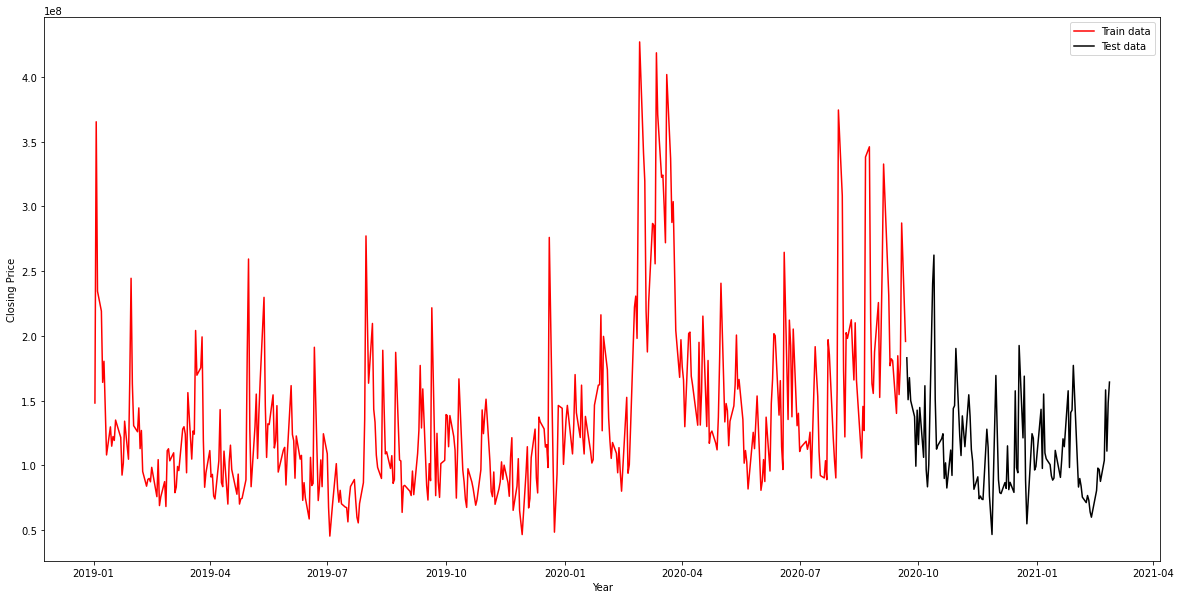

In [ ]:
#split data into train and training set
Stock_data_arima = df[selectData]
train_test_split_ratio = int(len(Stock_data_arima)*0.8)
train_data, test_data = Stock_data_arima[:train_test_split_ratio], Stock_data_arima[train_test_split_ratio:]


# Plotting the train and test sets.
plt.figure(figsize=(20,10))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(train_data, 'red', label='Train data')
plt.plot(test_data, 'black', label='Test data')
plt.legend()

# Modeling

Simple Exponential Smoothing

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anacon

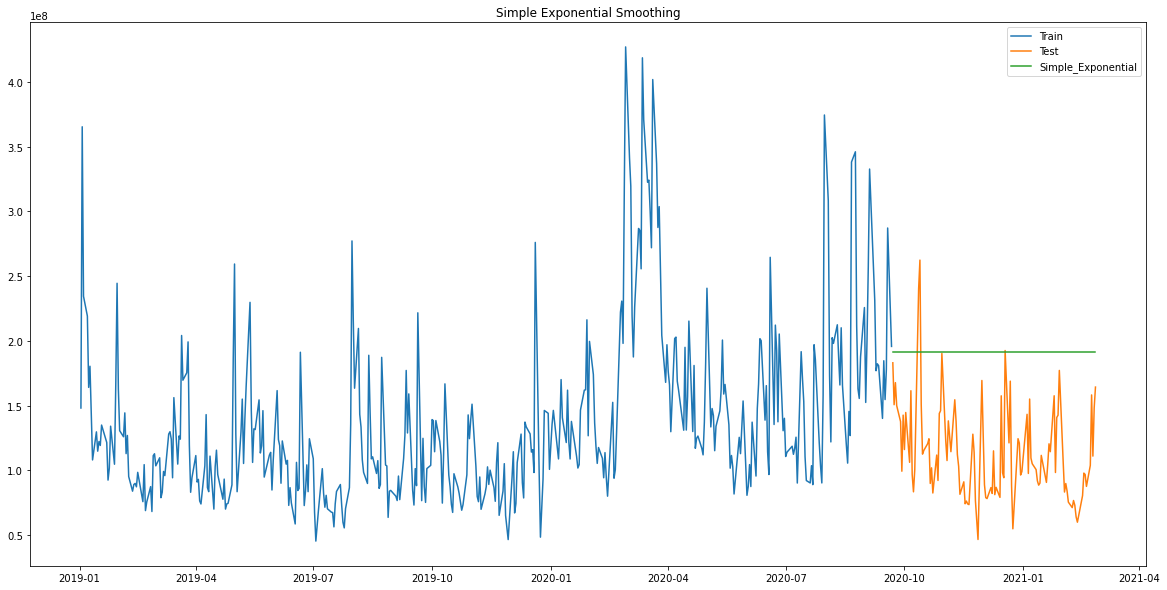

Simple Exponential Smoothing RMS :- 85249972.522 & Smoothing Level :- 0.05


In [ ]:
# Simple Exponential Smoothing Method
pred_values = test_data.copy()
pred_values = pd.DataFrame(pred_values)

Simple_Exponential_df = pd.DataFrame(columns = ['RMS','Smoothing Level'])

from itertools import permutations
perm = permutations(list(np.linspace(0.05,1,num=20)), 1)
for i in list(perm):
  fit_sim_exp = SimpleExpSmoothing(np.asarray(train_data)).fit(smoothing_level = i[0])
  pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test_data))

  rms = round(math.sqrt(mean_squared_error(test_data.values, pred_values.Simple_Exponential)),3)
  Simple_Exponential_df = Simple_Exponential_df.append(other = {'RMS' : rms , 'Smoothing Level' : i[0]} , ignore_index=True)

opt_values = Simple_Exponential_df.loc[Simple_Exponential_df['RMS'] == min(Simple_Exponential_df['RMS']),['Smoothing Level']].values


# Using optimised values from the lists.
fit_sim_exp = SimpleExpSmoothing(np.asarray(train_data)).fit(smoothing_level = opt_values[0][0])
pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test_data))

plt.figure(figsize=(20,10))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_values['Simple_Exponential'], label='Simple_Exponential')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()

rms_sim_exp = math.sqrt(mean_squared_error(test_data.values, pred_values.Simple_Exponential))
print("Simple Exponential Smoothing RMS :- " + str(round(rms_sim_exp,3)) + " & Smoothing Level :- "+str(round(opt_values[0][0],3)))

# Holt's Exponential Smoothing

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anacon

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anacon

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anacon

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anacon

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anacon

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anacon

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\lenovo\anacon

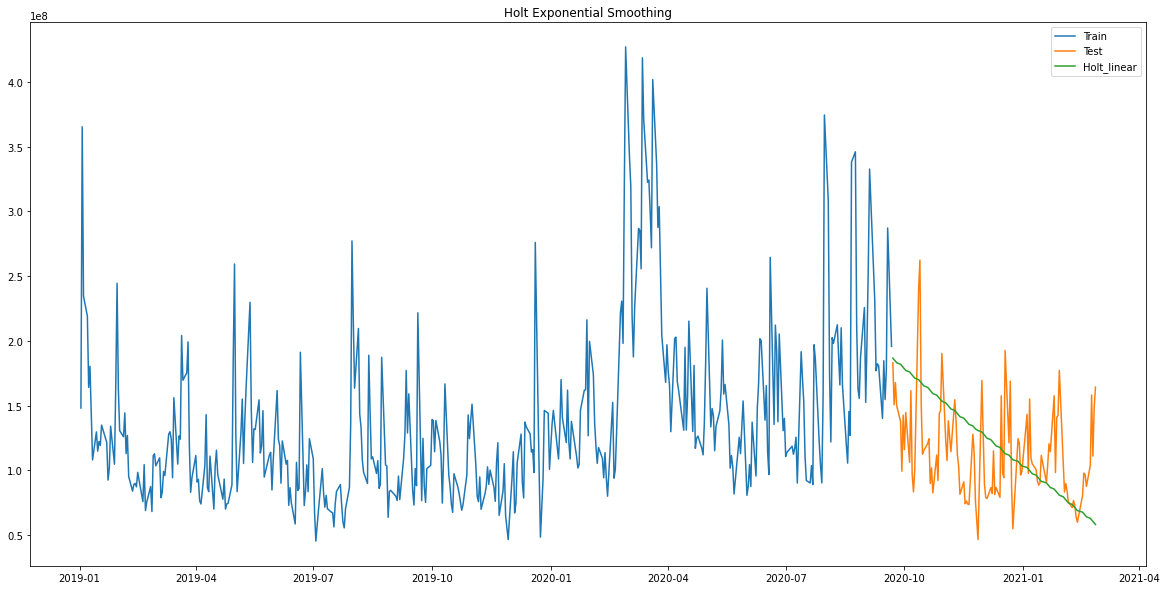

Holt’s Exponential Smoothing RMS :- 45121719.105 & Smoothing Level :- 0.2 & Smoothing Slope :- 0.3


In [ ]:
# Holt's Exponential Smoothing Method
holt_linear_df = pd.DataFrame(columns = ['RMS','Smoothing Level','Smoothing Slope'])

from itertools import permutations
perm = permutations(list(np.linspace(0.05,1,num=20)), 2)
for i in list(perm):
  fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level = i[0],smoothing_slope=i[1])
  pred_values['Holt_linear'] = fit_holt.forecast(len(test_data))

  rms = round(math.sqrt(mean_squared_error(test_data.values, pred_values.Holt_linear)),3)
  holt_linear_df = holt_linear_df.append(other = {'RMS' : rms , 'Smoothing Level' : i[0], 'Smoothing Slope':i[1]} , ignore_index=True)

opt_values = holt_linear_df.loc[holt_linear_df['RMS'] == min(holt_linear_df['RMS']),['Smoothing Level','Smoothing Slope']].values


# Using optimised values from the lists.
fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level = opt_values[0][0],smoothing_slope=opt_values[0][1])
pred_values['Holt_linear'] = fit_holt.forecast(len(test_data))

plt.figure(figsize=(20,10))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_values['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title('Holt Exponential Smoothing')
plt.show()

rms_holt_exp = math.sqrt(mean_squared_error(test_data.values, pred_values.Holt_linear))
print("Holt’s Exponential Smoothing RMS :- " + str(round(rms_holt_exp,3)) + " & Smoothing Level :- "+str(round(opt_values[0][0],3)) + " & Smoothing Slope :- "+str(round(opt_values[0][1],3)))

# AutoRegressive Integrated Moving Average

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=16538.486, BIC=16554.778, Time=0.514 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=16849.232, BIC=16857.378, Time=0.019 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=16544.391, BIC=16556.610, Time=0.029 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=16676.131, BIC=16688.351, Time=0.045 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=17587.344, BIC=17591.417, Time=0.065 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=16539.520, BIC=16559.885, Time=0.161 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=16531.442, BIC=16551.808, Time=0.086 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=16645.868, BIC=16662.160, Time=0.069 seconds
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=16527.991, BIC=16552.429, Time=0.164 seconds
Fit ARIMA(3,0,2)x(0,0,0,0) [intercept=True]; AIC=16528.695, BIC=16557.206, Time=0.212 seconds
Fit ARIMA(2,0,3)

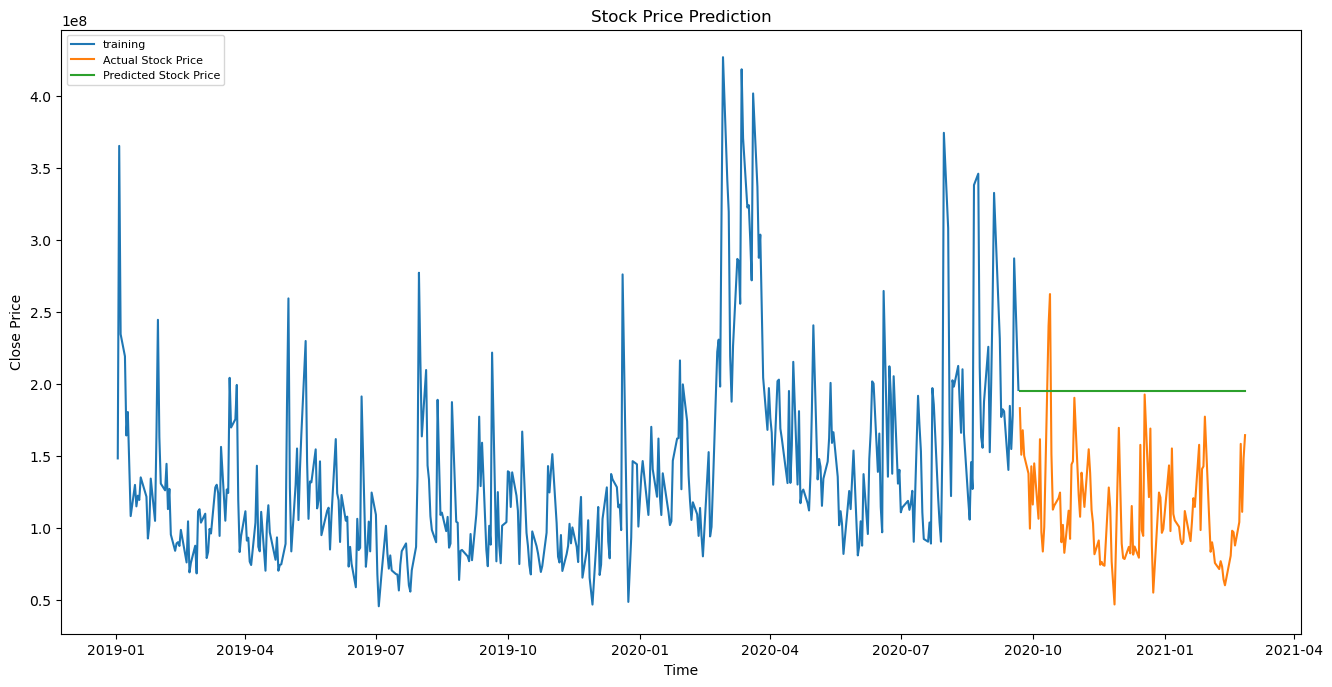

Auto-Arima RMSE :- 88964567.989


In [ ]:
# Auto ARIMA Method

arima_model = auto_arima(train_data,
                      start_p=1, start_q=1,
                      max_p=5, max_q=5,
                      test='adf',        
                      trace=True,
                      alpha=0.05,
                      scoring='mse',
                      suppress_warnings=True,
                      seasonal = False
                      )

# Fitting the final model with the order
fitted_model = arima_model.fit(train_data) 
print(fitted_model.summary())

# Forecasting the values.
forecast_values = fitted_model.predict(len(test_data), alpha=0.05) 
fcv_series = pd.Series(forecast_values[0], index=test_data.index)

#Plotting the predicted stock price and original price.
plt.figure(figsize=(16,8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='Actual Stock Price')
plt.plot(fcv_series,label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Evaluating the model by calculating RMSE.
rms_auto_arima = math.sqrt(mean_squared_error(test_data.values, fcv_series))
print("Auto-Arima RMSE :- " + str(round(rms_auto_arima,3)))

# Model comparison

In [ ]:
# Printing RMSE of all the methods
print("RMSE of all the methods")
print("Auto-Arima:- " + str(round(rms_auto_arima,3)))
print("Simple Exponential Smoothing:- " + str(round(rms_sim_exp,3)))
print("Holt’s Exponential Smoothing:- " + str(round(rms_holt_exp,3)))

RMSE of all the methods
Auto-Arima:- 88964567.989
Simple Exponential Smoothing:- 85249972.522
Holt’s Exponential Smoothing:- 45121719.105
